# NHANES Project
We're trying to replicate and update Hankinson

Load necessary modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nhanes_loader
import importlib
importlib.reload(nhanes_loader)



<module 'nhanes_loader' from '/Users/brad/Documents/Scripts/nhanes/nhanes_loader.py'>

## Import exam file

In [82]:
import nhanes.exam_file
importlib.reload(nhanes.exam_file)
from nhanes.exam_file import ExamFile

In [83]:
exam = ExamFile()

In [111]:
exam.data.shape

(31311, 35)

In [106]:
exam.cols.query('variable=="BMPWT"')

,description,variable,position,end position,length
377,Weight (kg) (2 months and over),BMPWT,1508,1513.0,6


In [107]:
exam.data.SPPMANEU.value_counts(dropna=False).sort_index()

0.0      150
1.0      252
2.0      325
3.0      730
4.0     2247
5.0     9037
6.0     3233
7.0     2056
8.0     1804
9.0      642
10.0     441
11.0      36
12.0      17
13.0      12
14.0       3
16.0       1
88.0    1445
NaN     8880
Name: SPPMANEU, dtype: int64

## Import Household Youth File

In [55]:
importlib.reload(nhanes.household_youth_file)
from nhanes.household_youth_file import HouseholdYouthFile

In [79]:
youth = HouseholdYouthFile()

In [59]:
youth.data.columns

Index(['SEQN', 'DMPFSEQ', 'DMPSTAT', 'DMARETHN', 'DMARACER', 'DMAETHNR',
       'HSSEX', 'HSDOIMO', 'HSAGEIR', 'HSAGEU',
       ...
       'HYK11AN', 'HYK12SN', 'HYK9DO', 'HYK9EO', 'HYK9FO', 'HYK11AO',
       'HYK12SO', 'HYM1', 'HYM2', 'HYM3'],
      dtype='object', length=687)

## Import Household Adult File

In [15]:
import nhanes.household_adult_file
importlib.reload(nhanes.household_adult_file)
from nhanes.household_adult_file import HouseholdAdultFile
adult = HouseholdAdultFile()
adult.data

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,...,HAL5,SEQN,DMARACER,DMARETHN,DMAETHNR,HSSEX,HSAGEIR,HSAGEU,HXPAXTMR,HXPSESSR
0,2,2,2,2,2,2,2,2,2,2,...,2,3,1,3,1,1,21,2,NaN,NaN
1,2,2,2,2,2,2,2,2,2,2,...,2,4,1,3,1,2,32,2,NaN,NaN
2,1,2,2,1,2,2,2,1,2,2,...,2,9,1,1,3,2,48,2,NaN,NaN
3,2,1,1,2,2,2,2,2,2,2,...,2,10,1,1,3,1,35,2,NaN,NaN
4,1,2,2,2,2,2,2,2,2,2,...,2,11,1,3,1,1,48,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,2,2,2,2,2,2,2,2,2,2,...,1,53594,1,1,3,2,26,2,NaN,NaN
20046,1,2,2,2,2,2,2,2,2,2,...,2,53595,1,3,1,1,32,2,NaN,NaN
20047,2,1,1,2,2,2,2,2,2,2,...,1,53616,1,1,3,1,85,2,NaN,NaN
20048,1,2,2,1,2,1,2,2,2,1,...,1,53618,1,1,3,2,79,2,NaN,NaN


## Reviewing Exam file

In [39]:
exam.data['PEFROVERFVC'] = exam.data.SPPPEAK / exam.data.SPPFVC

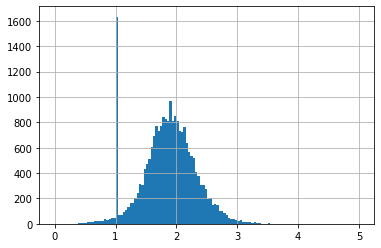

In [43]:
exam.data.PEFROVERFVC.hist(bins='auto', range=(0,5))

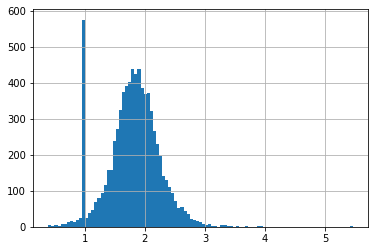

In [55]:
exam.data[(exam.data.HSSEX == 2) & (exam.data.DMARACER == 1)].PEFROVERFVC.hist(bins='auto')

## Reviewing adult file

In [160]:
cols = nh.cols
cols

,description,variable,position,end position,length
0,Sequence number,SEQN,1,5.0,5
1,Family sequence number,DMPFSEQ,6,10.0,5
2,Examination/interview status,DMPSTAT,11,NaN,1
3,Race-ethnicity,DMARETHN,12,NaN,1
4,Race,DMARACER,13,NaN,1
...,...,...,...,...,...
1233,BP statement read to SP (years 5 and 6),HAZA12,3336,NaN,1
1234,Average K1 BP from household and MEC,HAZMNK1R,3337,3339.0,3
1235,Number of BP's used for average K1,HAZNOK1R,3340,3341.0,2
1236,Average K5 BP from household and MEC,HAZMNK5R,3342,3344.0,3


In [82]:
cols[cols.description.str.contains('(?:smok|cig)')]

,description,variable,position,end position,length
259,Anyone living here smoke cigs in home,HFF1,1356,NaN,1
260,# persons who smoke cigarettes in home,HFF2R,1357,1358.0,2
261,Cigarettes per day person 1 smokes,HFF3A,1359,1361.0,3
262,Cigarettes per day person 2 smokes,HFF3B,1362,1364.0,3
263,Cigarettes per day person 3 smokes,HFF3C,1365,1367.0,3
264,Cigarettes per day person 4 smokes,HFF3D,1368,1370.0,3
265,Cigarettes per day person 5 smokes,HFF3E,1371,1373.0,3
266,Cigarettes per day person 6 smokes,HFF3F,1374,1376.0,3
419,Doctor told stop smoking for HBP,HAE4D3,1606,NaN,1
428,Now quit smoking for high blood pressure,HAE5D3,1615,NaN,1


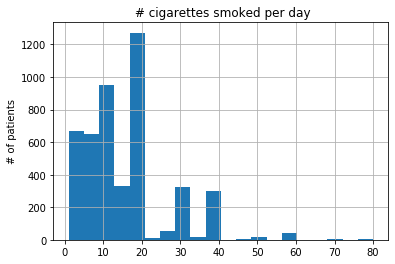

In [163]:
nh.hist_amount('HAR4S');

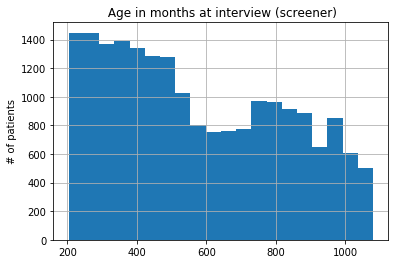

In [170]:
nh.hist_amount('HSAITMOR',outliers=1200);

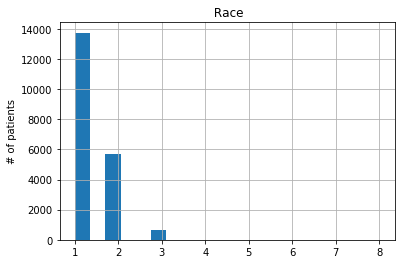

In [171]:
nh.hist_amount('DMARACER', outliers=25);

In [88]:
cols[cols.description.str.contains('weight|pounds') & ~cols.description.str.contains('(sample|interview|weighting|exam)')]

,description,variable,position,end position,length
210,Mother's weight calculated in pounds,HFC2S,1300,NaN,1
212,Father's weight calculated in pounds,HFC4S,1302,NaN,1
414,Doctor told control/lose weight for HBP,HAE4B,1601,NaN,1
424,Now controlling or losing weight for HBP,HAE5B,1611,NaN,1
435,Doctor told lose weight for HBC,HAE8B,1622,NaN,1
439,Now losing weight to lower cholesterol,HAE9B,1626,NaN,1
444,"On own for HBC, controlled/lost weight",HAE11B,1631,NaN,1
599,Difficulty lifting or carrying 10 pounds,HAH4,1807,NaN,1
705,Consider self over/under/right weight,HAM11,1964,NaN,1
707,Tried to lose weight in past 12 months,HAM13,1966,NaN,1


## Combine adult and exam files

match files on the `SEQN` field

In [16]:
adult_exam = adult.data.set_index('SEQN').join(exam.data.set_index('SEQN'),rsuffix='_exam')

In [17]:
adult_exam.DMARACER.value_counts(dropna=False)

1    13738
2     5664
3      640
8        8
Name: DMARACER, dtype: int64

In [185]:
exam.data.DMARACER.value_counts(dropna=False)

1      20762
2       9424
3       1119
8          6
NaN        0
Name: DMARACER, dtype: int64

In [184]:
adult.data.DMARACER.value_counts(dropna=False)

1    13738
2     5664
3      640
8        8
Name: DMARACER, dtype: int64

## Combine youth and exam files

In [84]:
youth_exam = youth.data.set_index('SEQN').join(exam.data.set_index('SEQN'),rsuffix='_exam')

## Hankinson Exclusion Process

In [31]:
exclusion = pd.read_csv('data/adult_exclusion.csv')
exclusion

,excluded_category,number_excluded,number_remaining,file,variable,exclusion_formula,inclusion_formula,what's excluded
0,include:Adults 17 yr of Age and Older with pul...,0,16484,Exam,SPPMANEU,88,SPPMANEU < 88,nothing
1,Spirometry judged “unusable” (< 2 acceptable c...,277,16207,Exam,SPPMANEU,<2 and not 88,1 < SPPMANEU < 88,< 2 acceptable trials
2,Adults 90 yr of age and older (actual age was ...,68,16139,Exam,HSAGEIR,>=90,HSAGEIR < 90,age >=90
3,Race/ethnicity coded as “Other”,636,15503,Exam,DMARETHN,4,DMARETHN < 4,other ethnicity
4,Cigarette smokers (Question R1.),7667,7836,Adult,HAR1,1,HAR1 == 2,cigarette smoker
5,Cigar and/or pipe smokers (Questions R23. and ...,313,7523,Adult,HAR23,1,HAR23 > 1,cigar smoker
6,.. pipe smokers,313,7523,Adult,HAR26,1,HAR26 > 1,pipe smoker
7,MD diagnosis of asthma (Question C1.e.),454,6661,Adult,HAC1E,1,HAC1E > 1,MD diagnosis asthma
8,MD diagnosis of chronic bronchitis (Question C...,181,6480,Adult,HAC1F,1,HAC1F > 1,MD diagnosis chronic bronchitis
9,MD diagnosis of emphysema (Question C1.g.),15,6465,Adult,HAC1G,1,HAC1G > 1,MD diagnosis emphysema


In [36]:
adult_final = adult_exam.query(' & '.join(exclusion.inclusion_formula.dropna()))

In [75]:
youth_exclusion = pd.read_csv('data/youth_exclusion.csv')
youth_exclusion

,excluded_category,number_excluded,number_remaining,file,variable,exclusion_formula,inclusion_formula,what's excluded
0,"Youths 8 to 16 yr of age, n = 4,143*",NaN,4143.0,NaN,HSAGEIR,NaN,7 < HSAGEIR < 17,NaN
1,Spirometry judged “unusable” (< 2 acceptable c...,40.0,4103.0,NaN,SPPMANEU,NaN,1 < SPPMANEU < 88,NaN
2,Race/ethnicity coded as “Other”,186.0,3917.0,NaN,DMARETHN,NaN,DMARETHN < 4,NaN
3,Cigarette smokers (Question B1),NaN,NaN,NaN,MYPB1,NaN,1 < MYPB1,NaN
4,Cigarette smokers (Question B3),239.0,3678.0,NaN,MYPB3,NaN,1 < MYPB3,NaN
5,"Smoked cigarettes, cigars, and/or pipes during...",NaN,NaN,NaN,MYPB11,NaN,MYPB11 == 0,NaN
6,Question B27A,NaN,NaN,NaN,MYPB27A,NaN,MYPB27A == 0,NaN
7,Question B27B,98.0,3580.0,NaN,MYPB27B,NaN,MYPB27B == 0,NaN
8,MD diagnosis of asthma (Question E1.g.),324.0,3256.0,NaN,HYE1G,NaN,1 < HYE1G,NaN
9,MD diagnosis of chronic bronchitis (Question E...,86.0,3170.0,NaN,HYE1H,NaN,1 < HYE1H,NaN


In [85]:
youth_final = youth_exam.query(' & '.join(youth_exclusion.inclusion_formula.dropna()))
youth_final.shape

UndefinedVariableError: name 'HYE1G' is not defined

# Regressions

In [30]:
adult_final

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,...,SPPTEMP,HSSEX_exam,WTPFHX6,MXPAXTMR,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam
SEQN,,,,,,,,,,,,,,,,,,,,,
3,2,2,2,2,2,2,2,2,2,2,...,22.0,1.0,1735.14,262.0,178.8,93.1,81.60,1,3.0,1.0
4,2,2,2,2,2,2,2,2,2,2,...,24.0,2.0,1725.01,384.0,162.2,86.1,61.65,1,3.0,1.0
45,2,2,2,2,2,2,2,2,2,2,...,24.0,2.0,4582.03,NaN,163.4,NaN,68.00,2,2.0,3.0
52,2,2,2,2,2,2,2,2,2,2,...,21.0,1.0,1398.57,603.0,178.2,95.4,79.60,1,3.0,1.0
53,2,2,2,2,2,2,2,2,2,2,...,21.0,1.0,24947.00,441.0,154.9,81.0,50.80,3,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53567,2,2,2,2,2,2,2,2,2,2,...,20.0,1.0,1953.48,433.0,158.7,84.4,74.55,1,3.0,1.0
53569,2,2,2,2,2,2,2,2,2,2,...,24.0,2.0,3654.45,509.0,175.3,87.3,74.35,2,4.0,2.0
53592,2,2,2,2,2,2,2,2,2,2,...,25.0,2.0,1195.42,236.0,166.8,85.5,53.20,1,3.0,1.0
